# Predict survival on the Titanic and get familiar with ML basics

## Table of Contents
1. Overview 
2. Importing the library
3. Data Acquistion
4. Data Cleaning & Preparation
5. Data Visualization 
6. Model training & evaluation

### 1. Overview

<b>Data Dictionary</b> <br>
| Variable | Definition | Key |
|:---------|:--------:|---------:|
|  survival   |  Survival   |  0 = No; 1 = Yes   |
|  pclass   |  Ticket class   |  1 = 1st, 2 = 2nd, 3 = 3rd   |
|  sex   |     |     |
|  Age   |  Age in years   |     |
|  sibsp   |  # of siblings / spouses aboard the Titanic   |     |
|  parch   |  # of parents / children aboard the Titanic   |     |
|  ticket   |  Ticket number   |     |
|  fare   |  Passenger fare   |     |
|  cabin   |  Cabin number   |     |
|  embarked   |  Port of Embarkation   |  C = Cherbourg, Q = Queenstown, S = Southampton   |

<b>Variable Notes</b> <br>
<b>1. pclass: A proxy for socio-economic status (SES)</b> <br>
1st = Upper <br>
2nd = Middle <br>
3rd = Lower <br>
<b>2. age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5 </b> <br>
<b>3. sibsp: The dataset defines family relations in this way...</b><br>
Sibling = brother, sister, stepbrother, stepsister <br>
<b>4. Spouse = husband, wife (mistresses and fiancés were ignored)</b>
<b>5. parch: The dataset defines family relations in this way...</b><br>
Parent = mother, father<br>
Child = daughter, son, stepdaughter, stepson<br>
Some children travelled only with a nanny, therefore parch=0 for them.

### 2. Importing the Library

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### 3. Data Acquistion

In [2]:
# Read Dataset train
data = pd.read_csv("data/train.csv")
data.head()
# For Survived Column: 
# 0 = No; 1 = Yes

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 4. Data Cleaning & Preparation

In [3]:
# Drop Unused column
df_train = data.drop(['Name', 'Ticket', 'PassengerId'], axis=1)

In [4]:
# Check Dataframe size data
df_train.shape

(891, 9)

In [5]:
#General Information for the Dataset (Datatypes)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [6]:
# Check for missing values
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
# Check duplicated dataframe
print(f' Total duplicate row:  {df_train.duplicated().sum()}')

 Total duplicate row:  107


In [11]:
df_train.drop_duplicates()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,NaN,Q
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [12]:
# Finding Modus of Embarked
print(f"Modus of Embarked : {df_train['Embarked'].mode()[0]}")

Modus of Embarked : S


In [13]:
# handling missing value

# drop the "Cabin" column from the dataframe
df_train = df_train.drop(columns='Cabin', axis = 1)

# replacing the missing value in "Age" column with mean value
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)

# replacing the missing value in "Embarked" columng with modus value
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

In [14]:
# Check for missing values
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [15]:
#Check Dataframe after handling missing value 
df_train.shape

(891, 8)

In [16]:
# Basic numeric statistic
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# Basic string statistic
df_train.describe(include=[object])

,Sex,Embarked
count,891,891
unique,2,3
top,male,S
freq,577,646


In [18]:
# Initialize the encoder
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

# Apply LabelEncoder to the 'Sex' and 'Embarked' columns and replace the contents of those columns.
df_train['Sex'] = le_sex.fit_transform(df_train['Sex'])
df_train['Embarked'] = le_embarked.fit_transform(df_train['Embarked'])
df_train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [19]:
print("Sex:")
for i, label in enumerate(le_sex.classes_):
    print(f"{label} -> {i}")

print("\nEmbarked:")
for i, label in enumerate(le_embarked.classes_):
    print(f"{label} -> {i}")

Sex:
female -> 0
male -> 1

Embarked:
C -> 0
Q -> 1
S -> 2


In [20]:
# Check dataframe label distribution
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [21]:
# imbalance handling with oversampling SMOTE

from imblearn.over_sampling import SMOTE

# Assuming 'target' is the target variable in the dataset
X = df_train.drop(['Survived'], axis=1)
Y = df_train['Survived']

smk = SMOTE(random_state=42)
X_resampled, Y_resampled = smk.fit_resample(X, Y)

resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                          pd.DataFrame(Y_resampled, columns=['Survived'])], axis=1)
resampled_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,2,0
1,1,0,38.0,1,0,71.2833,0,1
2,3,0,26.0,0,0,7.9250,2,1
3,1,0,35.0,1,0,53.1000,2,1
4,3,1,35.0,0,0,8.0500,2,0


In [22]:
# Check dataframe size after oversampling
resampled_df.shape

(1098, 8)

In [23]:
# Check dataframe label after oversampling 
resampled_df['Survived'].value_counts()

0    549
1    549
Name: Survived, dtype: int64

### 5. Data Visualization

<AxesSubplot:xlabel='Survived', ylabel='count'>

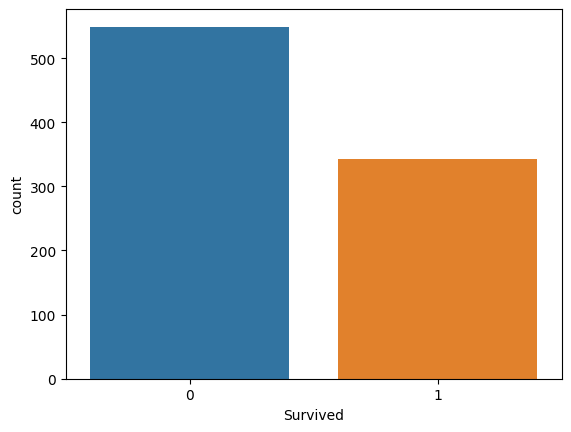

In [24]:
#countplot label dataframe before SMOTE 

sns.countplot(x='Survived', data=df_train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

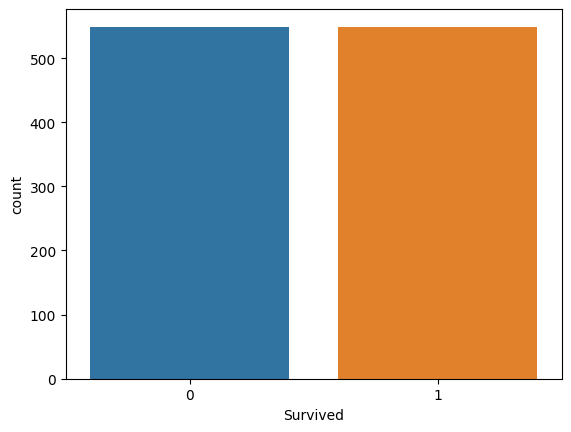

In [25]:
#countplot label dataframe after SMOTE 

sns.countplot(x='Survived', data=resampled_df)

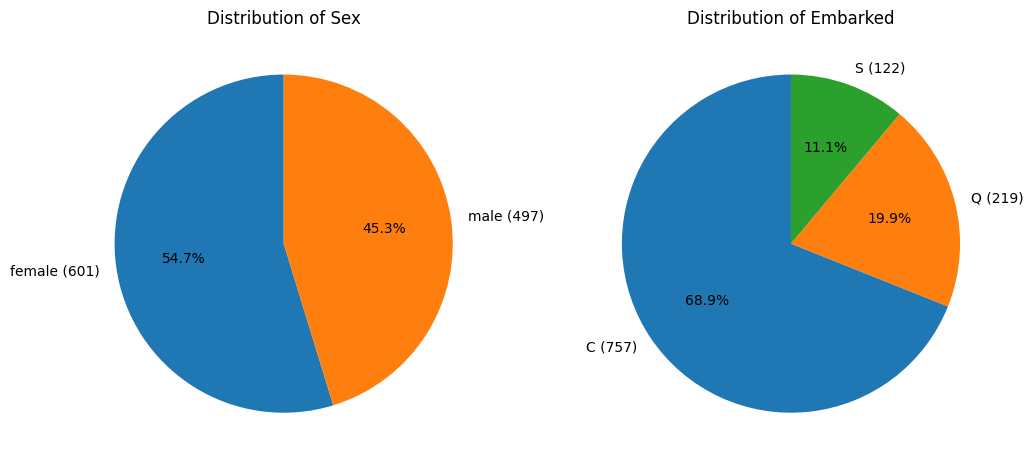

In [26]:
sex_counts = resampled_df['Sex'].value_counts()
embarked_counts = resampled_df['Embarked'].value_counts()

# Create labels with counts
sex_labels = [f"{label} ({count})" for label, count in zip(le_sex.classes_, sex_counts)]
embarked_labels = [f"{label} ({count})" for label, count in zip(le_embarked.classes_, embarked_counts)]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for 'Sex'
axs[0].pie(sex_counts, labels=sex_labels, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Distribution of Sex')

# Pie chart for 'Embarked'
axs[1].pie(embarked_counts, labels=embarked_labels, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Distribution of Embarked')

# Display the pie charts
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

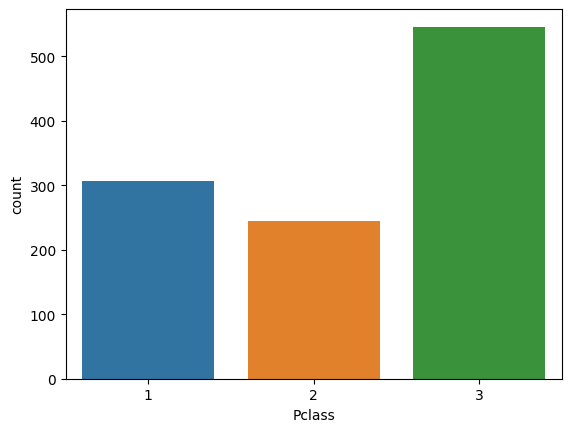

In [27]:
# countplot Pclass in dataframe
sns.countplot(x='Pclass', data=resampled_df)

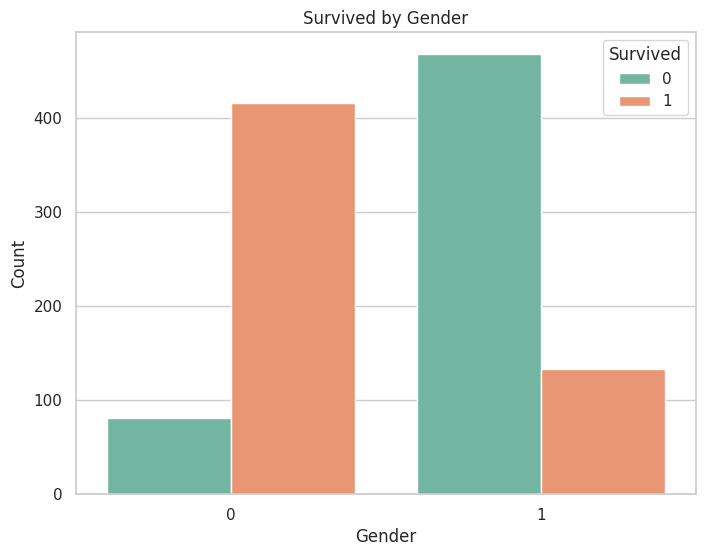

In [28]:
# make a plot
sns.set(style="whitegrid")

# make figure and axis
plt.figure(figsize=(8, 6))

# plot people suvived by gender
sns.countplot(x='Sex', hue='Survived', data=resampled_df, palette='Set2')

# add title and label
plt.title('Survived by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# show plot
plt.show()

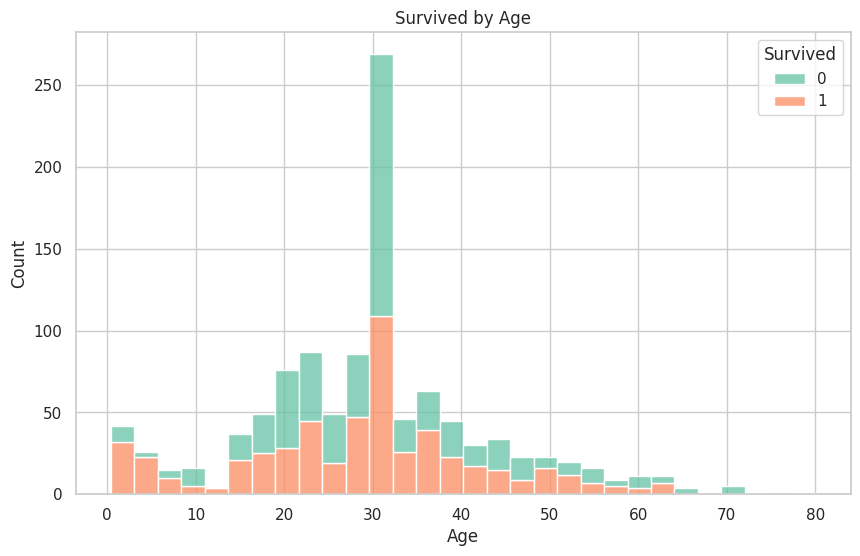

In [29]:
# Buat plot
sns.set(style="whitegrid")

# Buat figure dan axis
plt.figure(figsize=(10, 6))

# Plot histogram untuk usia berdasarkan status selamat
sns.histplot(data=resampled_df, x='Age', hue='Survived', multiple='stack', palette='Set2', bins=30)

# Tambahkan judul dan label
plt.title('Survived by Age')
plt.xlabel('Age')
plt.ylabel('Count')

# Tampilkan plot
plt.show()


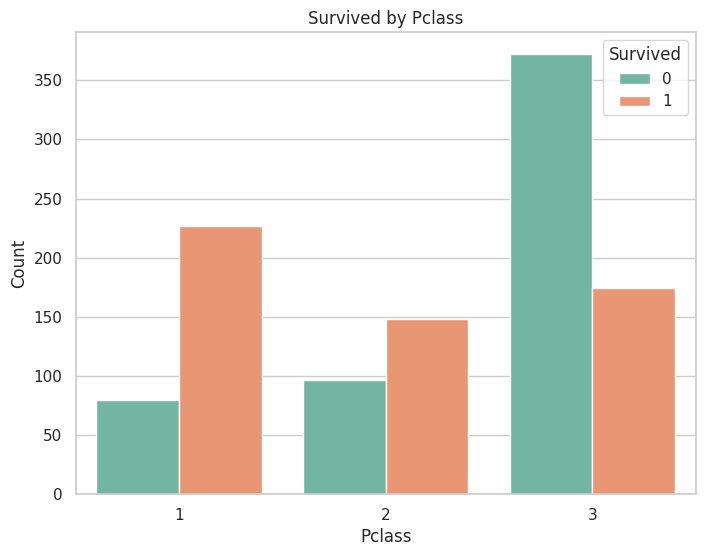

In [30]:
# Buat plot
sns.set(style="whitegrid")

# Buat figure dan axis
plt.figure(figsize=(8, 6))

# Plot jumlah orang yang selamat berdasarkan gender
sns.countplot(x='Pclass', hue='Survived', data=resampled_df, palette='Set2')

# Tambahkan judul dan label
plt.title('Survived by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')

# Tampilkan plot
plt.show()

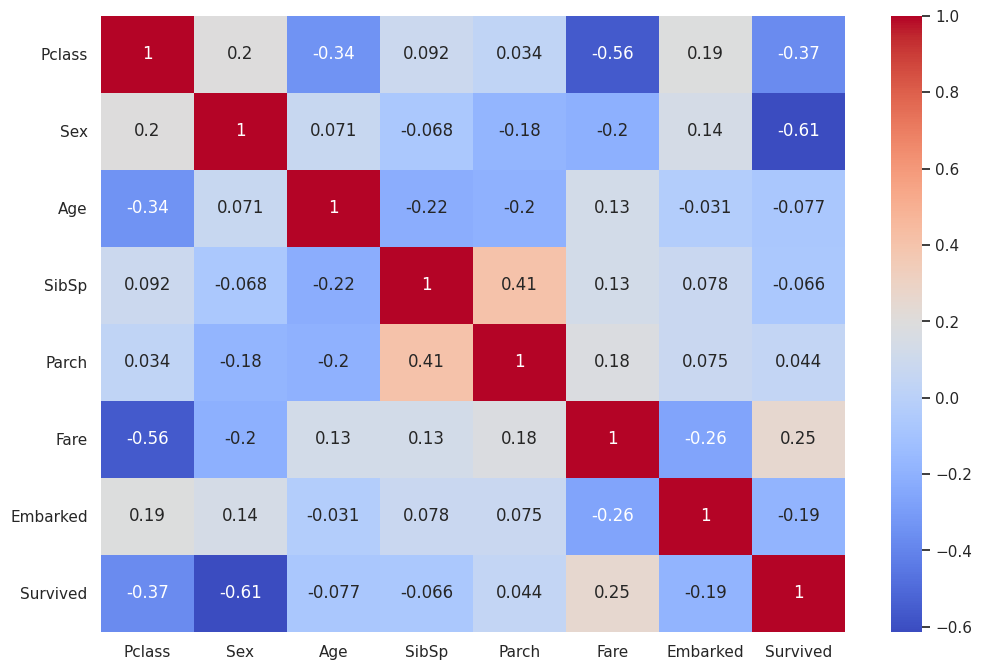

In [31]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(resampled_df.corr(), annot=True, cmap='coolwarm')
plt.show()

### 6. Model Training & Evaluation

In [32]:
# Assuming 'target' is the target variable in the dataset
X = resampled_df.drop(['Survived'], axis=1)
y = resampled_df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [33]:
X_train.shape

(878, 7)

In [34]:
X_test.shape

(220, 7)

In [35]:
# Initialize the models
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
xgb = XGBClassifier()

In [36]:
# Train the models
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [37]:
# Make predictions
log_reg_predictions = log_reg.predict(X_test)
decision_tree_predictions = decision_tree.predict(X_test)
xgb_predictions = xgb.predict(X_test)

In [38]:
# Evaluate the models
print("\nLogistic Regression:")
print("Accuracy:", accuracy_score(y_test, log_reg_predictions))
print("Classification Report:\n", classification_report(y_test, log_reg_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_reg_predictions))

print("\nDecision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, decision_tree_predictions))
print("Classification Report:\n", classification_report(y_test, decision_tree_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, decision_tree_predictions))

print("\nXGBoost:")
print("Accuracy:", accuracy_score(y_test, xgb_predictions))
print("Classification Report:\n", classification_report(y_test, xgb_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_predictions))


Logistic Regression:
Accuracy: 0.8409090909090909
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82       103
           1       0.82      0.91      0.86       117

    accuracy                           0.84       220
   macro avg       0.85      0.84      0.84       220
weighted avg       0.84      0.84      0.84       220

Confusion Matrix:
 [[ 79  24]
 [ 11 106]]

Decision Tree Classifier:
Accuracy: 0.8227272727272728
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81       103
           1       0.84      0.83      0.83       117

    accuracy                           0.82       220
   macro avg       0.82      0.82      0.82       220
weighted avg       0.82      0.82      0.82       220

Confusion Matrix:
 [[84 19]
 [20 97]]

XGBoost:
Accuracy: 0.8636363636363636
Classification Report:
               precision    recall  f1-score   su

In [40]:
# Calculating accuracy
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

# Save accuracy results into a dictionary
accuracies = {
    'Logistic Regression': log_reg_accuracy,
    'Decision Tree': decision_tree_accuracy,
    'XGBoost': xgb_accuracy
}

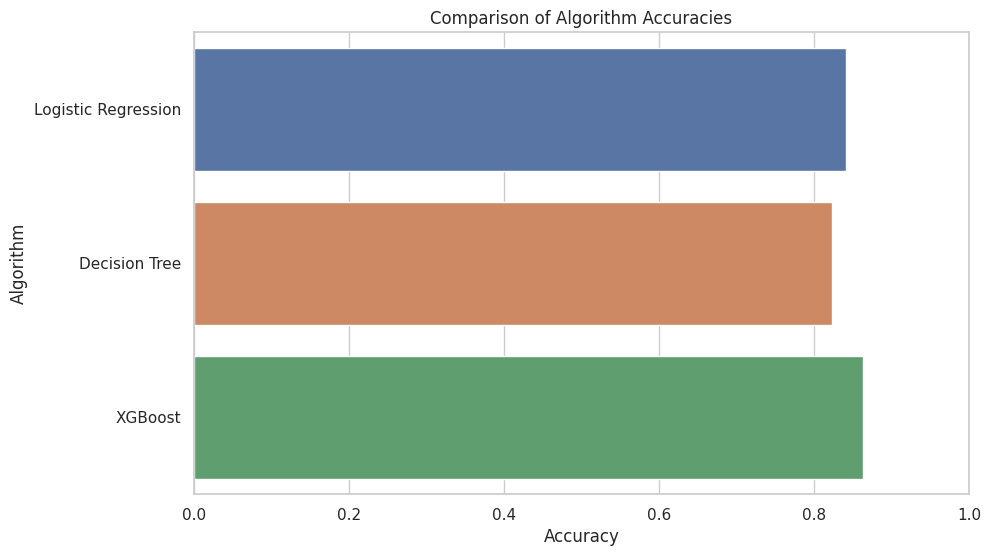

In [41]:
# Converting a dictionary into a DataFrame
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Algorithm', 'Accuracy'])

# Creating a bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Algorithm', data=accuracy_df)
plt.title('Comparison of Algorithm Accuracies')
plt.xlim(0, 1)
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
plt.show()